## Import the necessary libraries

In [34]:
import pandas as pd
import json
from pandas.io.json import json_normalize


## Load as Pandas dataframe

In [228]:

sample_json_df = pd.read_json('data/world_bank_projects.json')


## See the first and last 10 entries

In [7]:
sample_json_df.head(2)

sample_json_df.tail(2)

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
498,{'$oid': '52b213b38594d8a2be17c972'},2013,August,2012-08-02T00:00:00Z,REPUBLIC OF INDONESIA,2017-09-30T00:00:00Z,Republic of Indonesia!$!ID,ID,Republic of Indonesia,Indonesia,...,"YA,BL,AB",IBRD,Active,N,"{'Percent': 85, 'Name': 'Rural services and in...","[{'code': '78', 'name': 'Rural services and in...","77,91,78",80000000,80000000,http://www.worldbank.org/projects/P117243/sust...
499,{'$oid': '52b213b38594d8a2be17c973'},2013,August,2012-08-02T00:00:00Z,GOVERMENT OF KENYA,2018-12-31T00:00:00Z,Republic of Kenya!$!KE,KE,Republic of Kenya,Kenya,...,"BV,TC",IBRD,Active,N,"{'Percent': 1, 'Name': 'Municipal governance a...","[{'code': '73', 'name': 'Municipal governance ...","39,49,88,73",300000000,300000000,http://www.worldbank.org/projects/P126321/keny...


## What is the number of observations in the dataset?

In [8]:
sample_json_df.info() #500 observations
sample_json_df.shape[0] #500 observations

#15 borrowers are missing 
#54 docty are missing
#70 envassesmentcategorycode are missing
#impagency are missing


<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

500

In [9]:
sample_json_df.shape[1]

50

<b>What is the number of columns in the dataset and print the name of all the columns.</b>

In [10]:
sample_json_df.shape[1] #50 columns in the dataset
sample_json_df.columns 


Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract', 'project_name', 'projectdocs',
       'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode',
       'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1',
       'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url'],
      dtype='object')

## How is the dataset indexed?

In [11]:
sample_json_df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            490, 491, 492, 493, 494, 495, 496, 497, 498, 499],
           dtype='int64', length=500)

## Handle missing Data

In [12]:
sample_json_df["project_abstract"].fillna(sample_json_df["project_abstract"], inplace=True)
sample_json_df["project_abstract"].head(3)

0    {'cdata': 'The development objective of the Se...
1                                                  NaN
2                                                  NaN
Name: project_abstract, dtype: object

## Fill in missing in lendprojectcost with each project_name’s mean value of lendprojectcost


In [14]:
sample_json_df["meanprojectcost"]=sample_json_df['lendprojectcost']
sample_json_df["meanprojectcost"].fillna(sample_json_df.groupby("project_name")["lendprojectcost"].transform("mean"), inplace=True)
sample_json_df.head(4)

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url,meanprojectcost
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...,550000000
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en,5700000
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en,6060000
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en,1500000


## Select the rows of df where sector4 is not NaN and lendprojectcost is not NaN

In [15]:
sample_json_df[sample_json_df['sector4'].notnull() & sample_json_df['lendprojectcost'].notnull()].head(3)

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url,meanprojectcost
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...,550000000
11,{'$oid': '52b213b38594d8a2be17c78b'},2014,October,2013-10-25T00:00:00Z,NaN,2017-12-31T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,IBRD,Active,N,"{'Percent': 60, 'Name': 'Rural services and in...","[{'code': '78', 'name': 'Rural services and in...","81,87,52,78",250000000,250000000,http://www.worldbank.org/projects/P146653?lang=en,250000000
18,{'$oid': '52b213b38594d8a2be17c792'},2014,October,2013-10-16T00:00:00Z,ROYAL GOVERNMENT OF CAMBODIA,NaN,Kingdom of Cambodia!$!KH,KH,Kingdom of Cambodia,Cambodia,...,IBRD,Active,Y,"{'Percent': 17, 'Name': 'Child health'}","[{'code': '63', 'name': 'Child health'}, {'cod...","69,57,25,67,63",0,13450000,http://www.worldbank.org/projects/P146271?lang=en,13450000


## How many different projects are being worked on?

In [16]:
sample_json_df.project_name.value_counts().count()

500

## How many different countries are part of world bank project?

In [17]:
sample_json_df.countrycode.value_counts().count()

118

## List Approval Fiscal Years?

In [18]:
approval_fiscal_years = sample_json_df['approvalfy'].unique()
approval_fiscal_years

array([1999, 2015, 2014, 2013])

## List top 10 projects with highest grant amount

In [20]:


c=sample_json_df[sample_json_df['projectstatusdisplay']=='Active'].groupby(['project_name','countryname']).sum()

c=c.sort_values(['grantamt'],ascending=False).head(10)

c = c.drop(['ibrdcommamt', 'idacommamt','totalamt','totalcommamt'], axis=1)



## Select project columns

In [456]:
sample_json_df.loc[:,['_id','countrycode','countryname','project_name','projectdocs','projectstatusdisplay']].head(3)

,_id,countrycode,countryname,project_name,projectdocs,projectstatusdisplay
0,{'$oid': '52b213b38594d8a2be17c780'},ET,Federal Democratic Republic of Ethiopia,Ethiopia General Education Quality Improvement...,"[{'DocDate': '28-AUG-2013', 'EntityID': '09022...",Active
1,{'$oid': '52b213b38594d8a2be17c781'},TN,Republic of Tunisia,TN: DTF Social Protection Reforms Support,"[{'DocDate': '29-MAR-2013', 'EntityID': '00033...",Active
2,{'$oid': '52b213b38594d8a2be17c782'},TV,Tuvalu,Tuvalu Aviation Investment Project - Additiona...,"[{'DocDate': '21-OCT-2013', 'EntityID': '00033...",Active


In [314]:
sample_json_df.describe()

,approvalfy,grantamt,ibrdcommamt,idacommamt,lendprojectcost,totalamt,totalcommamt,meanprojectcost
count,500.000000,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,2013.108000,4.432400e+06,3.286010e+07,3.542136e+07,1.547241e+08,6.828146e+07,7.271386e+07,1.547241e+08
std,0.722066,2.023307e+07,1.089197e+08,7.681431e+07,4.764211e+08,1.242662e+08,1.234705e+08,4.764211e+08
min,1999.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+04,0.000000e+00,3.000000e+04,3.000000e+04
25%,2013.000000,0.000000e+00,0.000000e+00,0.000000e+00,6.472500e+06,0.000000e+00,5.000000e+06,6.472500e+06
50%,2013.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.500000e+07,2.000000e+07,2.500000e+07,3.500000e+07
75%,2013.000000,1.695000e+06,0.000000e+00,3.700000e+07,1.021250e+08,8.625000e+07,9.045000e+07,1.021250e+08
max,2015.000000,3.650000e+08,1.307800e+09,6.000000e+08,5.170000e+09,1.307800e+09,1.307800e+09,5.170000e+09


## Verify that the data in the columns are clean and consistent

In [229]:
# Extracting all the data relating to country for each projects
country_columns=['country_namecode', 'countrycode', 'countryname', 'countryshortname']

# Getting complete list of unique combinations of entries in the 4 country columns
country_no_dup = sample_json_df[country_columns].drop_duplicates().reset_index(drop=True)

# Confirming that all 'country_namecode' columns are made up from the 'countryname' and 'countrycode' columns
assert country_no_dup['country_namecode'].equals(country_no_dup.countryname + '!$!' + country_no_dup.countrycode)

# Printing for manual validation any row where the countryshortname isn't contained in the countryname
mask = country_no_dup.apply(lambda x: x['countryshortname'] not in x['countryname'], axis=1)
country_no_dup[mask]

,country_namecode,countrycode,countryname,countryshortname
3,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of"
33,Argentine Republic!$!AR,AR,Argentine Republic,Argentina
34,Republic of The Gambia!$!GM,GM,Republic of The Gambia,"Gambia, The"
36,Republic of Congo!$!CG,CG,Republic of Congo,"Congo, Republic of"
37,Democratic Republic of Sao Tome and Prin!$!ST,ST,Democratic Republic of Sao Tome and Prin,Sao Tome and Principe
50,Lebanese Republic!$!LB,LB,Lebanese Republic,Lebanon
61,Arab Republic of Egypt!$!EG,EG,Arab Republic of Egypt,"Egypt, Arab Republic of"
74,Democratic Republic of the Congo!$!ZR,ZR,Democratic Republic of the Congo,"Congo, Democratic Republic of"
100,The Independent State of Papua New Guine!$!PG,PG,The Independent State of Papua New Guine,Papua New Guinea
101,Democratic Socialist Republic of Sri Lan!$!LK,LK,Democratic Socialist Republic of Sri Lan,Sri Lanka


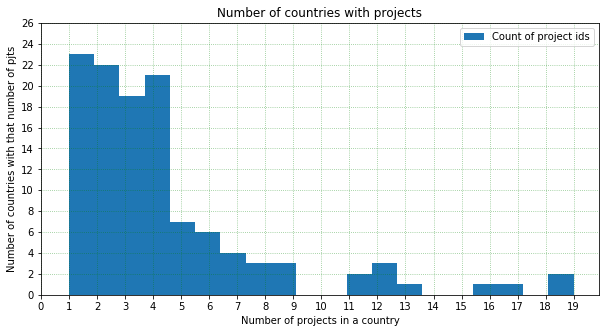

,id
countryshortname,
Afghanistan,6
Africa,11
Albania,4
Angola,1
Antigua and Barbuda,1
Argentina,2
Armenia,8
Azerbaijan,4
Bangladesh,12


In [230]:
# visualizing distribution of projects in countries
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)

plotdf = sample_json_df[['countryshortname', '_id']].groupby('countryshortname').count()
plotdf = plotdf.rename(columns={'_id':'id'})
plotdf.plot(kind='hist', bins=20 )
plt.title('Number of countries with projects')
plt.xlabel('Number of projects in a country')
plt.ylabel('Number of countries with that number of pjts')
plt.xticks(range(20))
plt.yticks(range(0, 28, 2))
plt.grid(color='g', alpha=0.5, linestyle=':')
plt.legend(['Count of project ids'])
plt.show()
plotdf

## List all the missing names in mjtheme_namecode theme

In [296]:
json_string = json.load((open('data/world_bank_projects.json')))
# using json_normalize to get the project information directly
theme_df = json_normalize(json_string, 'mjtheme_namecode')

theme_df_missing = theme_df.name.map(lambda x: x == '' )

#theme_df.loc[theme_df_missing==True].groupby('code')['code'].count()
theme_df_missing = theme_df.loc[theme_df_missing==True].groupby('code').size().sort_values(ascending=False)
theme_df_missing




code
11    27
4     16
2     15
10    14
8     13
7     11
6     10
5      5
1      5
9      3
3      3
dtype: int64

In [ ]:
## Present Name, codes in combination with totals

In [315]:
# add column indicating if project theme is named or just coded
theme_df['named'] = theme_df.name.map(lambda x: 'named' if x != '' else 'code only')
# pivoting data to create table showing the number project themes 'named' and 'code only'.
counted = theme_df.reset_index().pivot_table(index=['code'], columns='named', values='index', aggfunc='count')
counted['totals'] = counted.sum(axis='columns')


# Creating a lookup table which names go with which codes
cn_lookup = theme_df.loc[theme_df.name.map(lambda x: x != ''),['code', 'name']].drop_duplicates()
# adding combined project theme name code column
cn_lookup['combo'] = cn_lookup[['name', 'code']].apply(lambda x: '{} (code:{})'.format(x[0], x[1]), axis=1)
# setting lookup table index to 'code'
cn_lookup = cn_lookup.set_index('code')

counted = pd.concat([counted, cn_lookup['combo']], axis=1, sort=False)
# a more complex way of doing the concat above
#counted['combo'] = [cn_lookup.loc[v]['combo'] for v in counted.reset_index()['code'].values]

# sorting, ordering columns and printing
counted = counted[['combo', 'code only', 'named', 'totals']].sort_values('totals', ascending=False)
counted.index.name = ''
print('The most common project theme is: {}\nwith {} projects.'.format(counted.combo[0],counted['totals'][0]))
print('Here are the rest of the project themes in decending order.\nThere are a total of 11 different themes')
counted


KeyError: 'index'

## Find the 10 countries with most projects

In [233]:
sample_json_df[sample_json_df['projectstatusdisplay']=='Active'].groupby(['countryname','countrycode'])['project_name'].count().sort_values(ascending=False).head(10)


countryname                      countrycode
People's Republic of China       CN             19
Republic of Indonesia            ID             16
Republic of India                IN             15
Socialist Republic of Vietnam    VN             14
Republic of Yemen                RY             13
People's Republic of Bangladesh  BD             12
Africa                           3A             11
Nepal                            NP             11
Republic of Mozambique           MZ              9
Islamic Republic of Pakistan     PK              9
Name: project_name, dtype: int64

## Find the top 10 major project themes (using column 'mjtheme_namecode')

In [234]:
#Method 1:
#pjt_theme_list = []
#[pjt_theme_list.extend(r) for r in sample_json_df['mjtheme_namecode']]
# converting back to dataframe
#pjt_theme_1 = pd.DataFrame(pjt_theme_list)

#Method 2:
flat_list = [item for sublist in sample_json_df['mjtheme_namecode'] for item in sublist]
project_theme_df=json_normalize(flat_list)
project_theme_df.columns = project_theme_df.columns.map(str.strip)
project_theme_df.groupby(['code','name']).size().reset_index().rename(columns={0:'count'}).sort_values('count',ascending=False).head(10)

#grouped = project_theme_df.groupby(['code','name']).agg('name' : "count") 
#Using ravel, and a string join, we can create better names for the columns:
#grouped.columns = ["_".join(x) for x in project_theme_df.columns.ravel()]
#grouped.columns

#Method 3: 
#all_themes_df = project_theme_df.groupby(['code','name'])['name'].count().sort_values(ascending=False).head(10)
#all_themes_df.rename(columns={"code": "code", "name": "project theme name", "": "count"})

## confirming both methods of accessing the json are equivalent
#project_theme_df.equals(pjt_theme_1)



,code,name,count
5,11,Environment and natural resources management,223
3,10,Rural development,202
19,8,Human development,197
7,2,Public sector governance,184
15,6,Social protection and risk management,158
11,4,Financial and private sector development,130
17,7,Social dev/gender/inclusion,119
13,5,Trade and integration,72
21,9,Urban development,47
1,1,Economic management,33


## 3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [235]:
#Method 1
import numpy as np

#Remove Duplicates from dictionary to create a lookup table
code_name_lookup_df = project_theme_df.drop_duplicates(['code'])
code_name_lookup_df

#Fill all the missing values with "MISSING THEME" (practice steps, but not necessary for the problem)
missing_themes_df = project_theme_df[project_theme_df['name']==''].replace(r'', np.nan, regex=True).fillna("MISSING THEME") #.count()
missing_themes_df

missing_themes_df = missing_themes_df.merge(code_name_lookup_df, on='code')
missing_themes_df[['code','name_y']].sort_values('code',ascending='True').drop_duplicates(['code'])

filled_themes_df = pd.merge(project_theme_df,code_name_lookup_df, on='code',how='inner',suffixes=['_old','_new'])

#Check if there are any "MISSING THEMES" in the new dataframe with all missing values filled in
filled_themes_df[(filled_themes_df.name_new == "MISSING THEME")].sort_index(ascending='True')


,code,name_old,name_new


In [245]:
#Method 2
project_theme_df.name = project_theme_df.name.apply(lambda x: x.capitalize()).apply(lambda x: x.strip())
lookup_df = project_theme_df.loc[project_theme_df.name.map(lambda x: x != ''),['code','name']].drop_duplicates()
lookup_df

,code,name
0,8,Human development
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
8,7,Social dev/gender/inclusion
11,4,Financial and private sector development
18,10,Rural development
53,9,Urban development


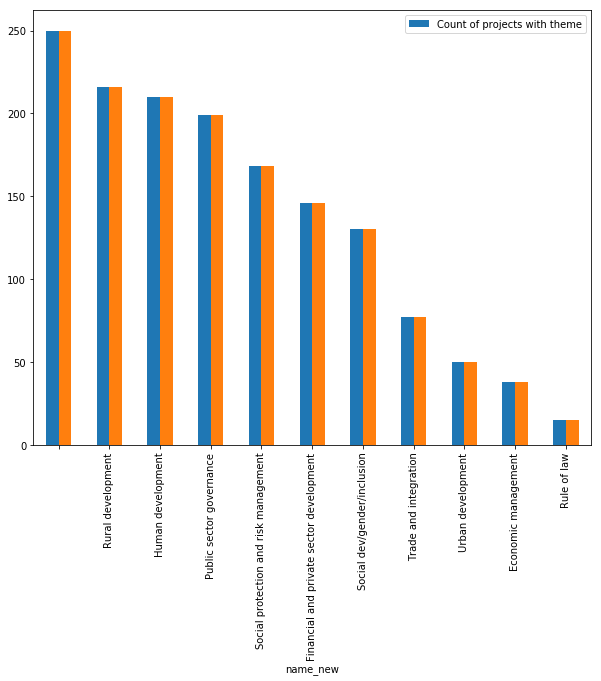

In [168]:
# visualizing project theme breakdown
plt.rcParams["figure.figsize"] = (10,8)
filled_themes_df.drop('name_old',1)
plotdf = filled_themes_df.groupby('name_new').count().sort_values('code',ascending=False)
plotdf.plot(kind='bar')
plt.legend(['Count of projects with theme'])
plt.show()